In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../../data/dataset.csv", index_col='timestamp')
df.head()

,bitcoin_usd,litecoin_usd,ripple_usd,ethereum_usd,China_confirmed,Italy_confirmed,Iran_confirmed,Spain_confirmed,Germany_confirmed,USA_confirmed,...,USA_deaths,France_deaths,S. Korea_deaths,Switzerland_deaths,UK_deaths,Portugal_deaths,bitcoin_web,ethereum_web,ripple_web,litecoin_web
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-04-28,135.30,4.29983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-29,141.96,4.35940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-30,135.30,4.18295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-01,117.00,3.64914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-02,103.43,3.38879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


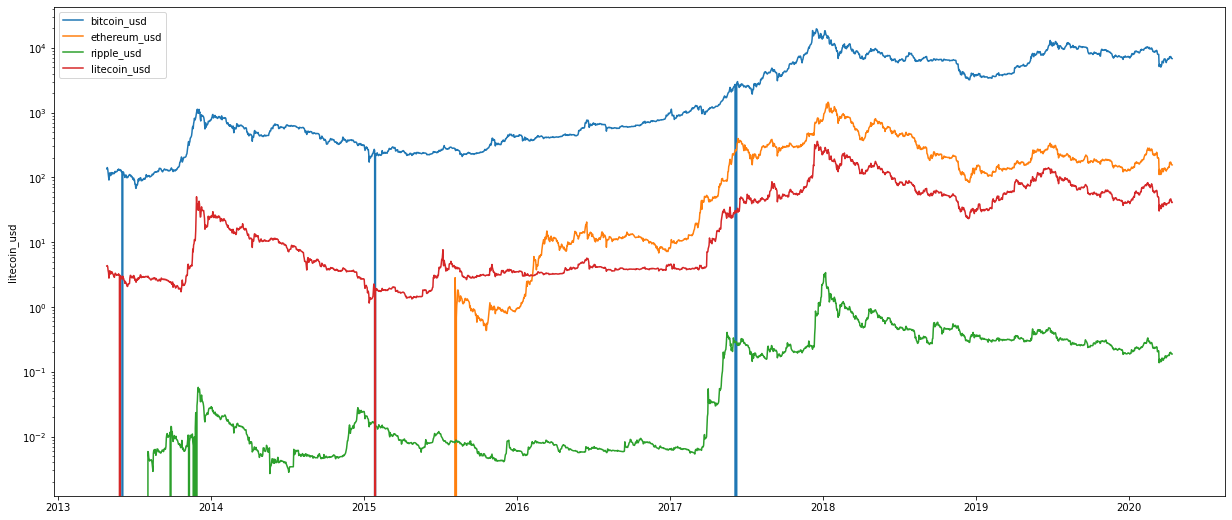

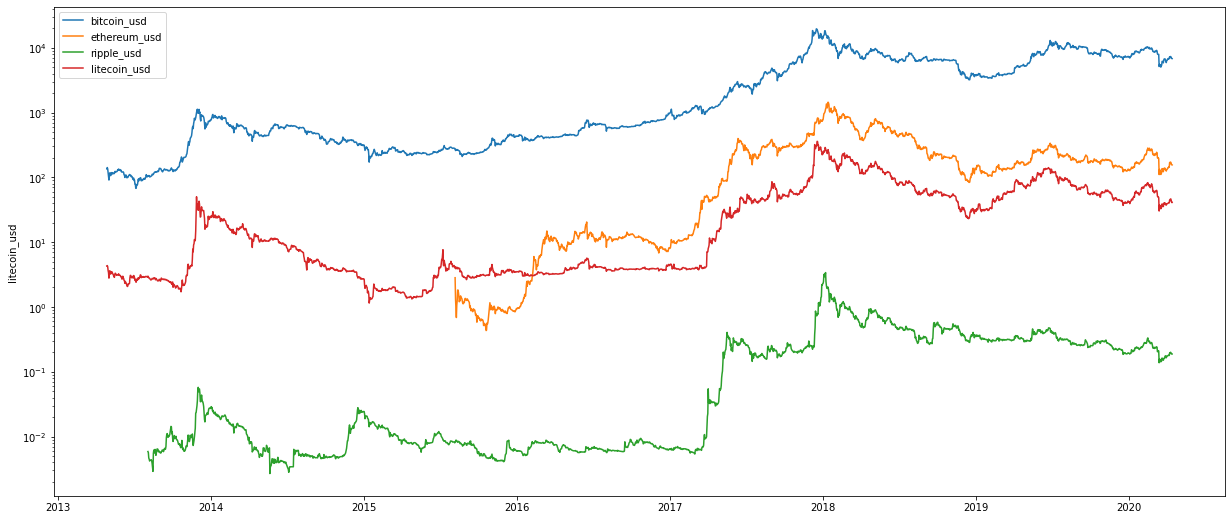

In [10]:
import datetime

plt.figure(figsize=(21, 9))
dates  = [datetime.date(year=int(s[:4]), month=int(s[5:7]), day=int(s[8:])) for s in df.index.values]
sns.lineplot(data=df, x=dates, y='bitcoin_usd', legend='brief', label='bitcoin_usd')
sns.lineplot(data=df, x=dates, y='ethereum_usd', legend='brief', label='ethereum_usd')
sns.lineplot(data=df, x=dates, y='ripple_usd', legend='brief', label='ripple_usd')
sns.lineplot(data=df, x=dates, y='litecoin_usd', legend='brief', label='litecoin_usd')
plt.yscale('log')

coins = ['bitcoin_usd', 'ethereum_usd', 'ripple_usd', 'litecoin_usd']
df = df.replace({0: np.nan, 0.0: np.nan})


plt.figure(figsize=(21, 9))
dates  = [datetime.date(year=int(s[:4]), month=int(s[5:7]), day=int(s[8:])) for s in df.index.values]
sns.lineplot(data=df, x=dates, y='bitcoin_usd', legend='brief', label='bitcoin_usd')
sns.lineplot(data=df, x=dates, y='ethereum_usd', legend='brief', label='ethereum_usd')
sns.lineplot(data=df, x=dates, y='ripple_usd', legend='brief', label='ripple_usd')
sns.lineplot(data=df, x=dates, y='litecoin_usd', legend='brief', label='litecoin_usd')
plt.yscale('log')

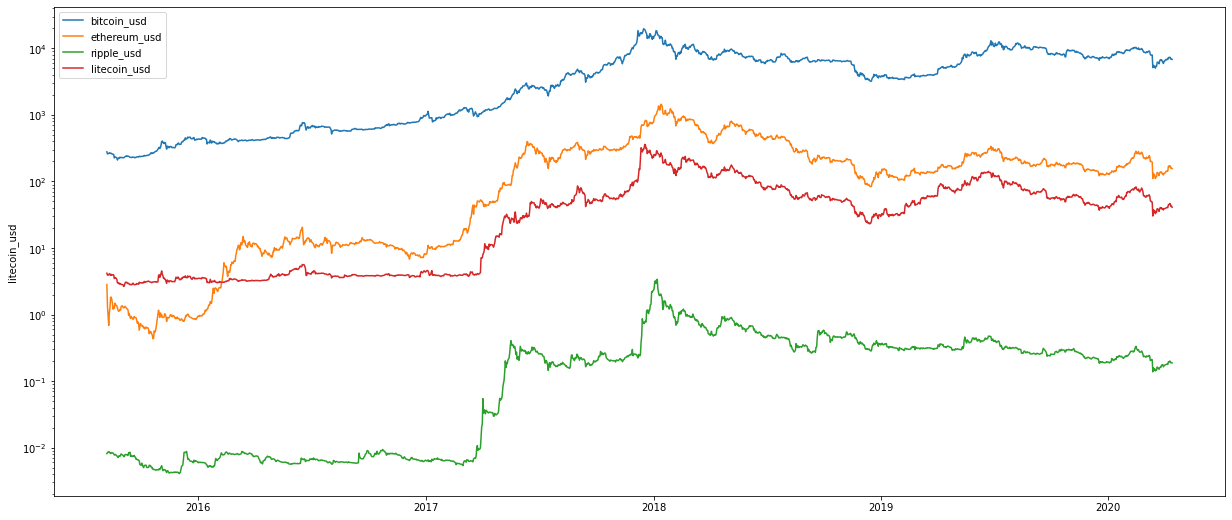

In [11]:
df = df.filter(df[~np.isnan(df['ethereum_usd'])].index, axis=0)

plt.figure(figsize=(21, 9))
dates  = [datetime.date(year=int(s[:4]), month=int(s[5:7]), day=int(s[8:])) for s in df.index.values]
sns.lineplot(data=df, x=dates, y='bitcoin_usd', legend='brief', label='bitcoin_usd')
sns.lineplot(data=df, x=dates, y='ethereum_usd', legend='brief', label='ethereum_usd')
sns.lineplot(data=df, x=dates, y='ripple_usd', legend='brief', label='ripple_usd')
sns.lineplot(data=df, x=dates, y='litecoin_usd', legend='brief', label='litecoin_usd')
plt.yscale('log')

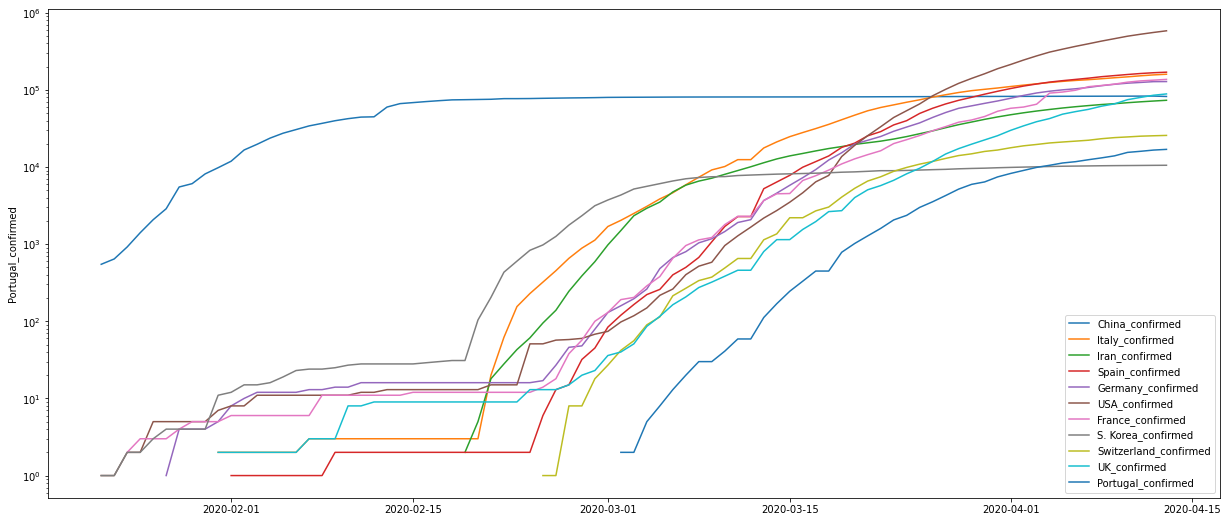

In [12]:
df_covid = df.filter(df[df['China_confirmed'] != 0].index, axis=0)


plt.figure(figsize=(21, 9))
dates  = [datetime.date(year=int(s[:4]), month=int(s[5:7]), day=int(s[8:])) for s in df_covid.index.values]
for c in df_covid.columns:
    if '_deaths' not in c and '_web' not in c and c not in coins:
        sns.lineplot(data=df_covid, x=dates, y=c, legend='brief', label=c)
plt.yscale('log')

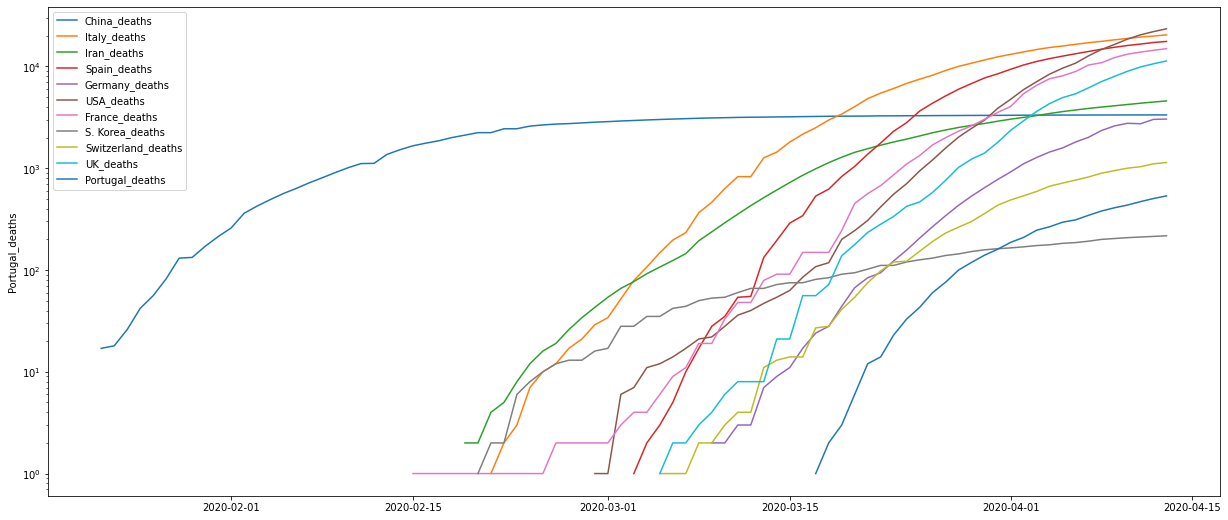

In [13]:
plt.figure(figsize=(21, 9))
dates  = [datetime.date(year=int(s[:4]), month=int(s[5:7]), day=int(s[8:])) for s in df_covid.index.values]
for c in df_covid.columns:
    if '_confirmed' not in c and '_web' not in c and c not in coins:
        sns.lineplot(data=df_covid, x=dates, y=c, legend='brief', label=c)
plt.yscale('log')

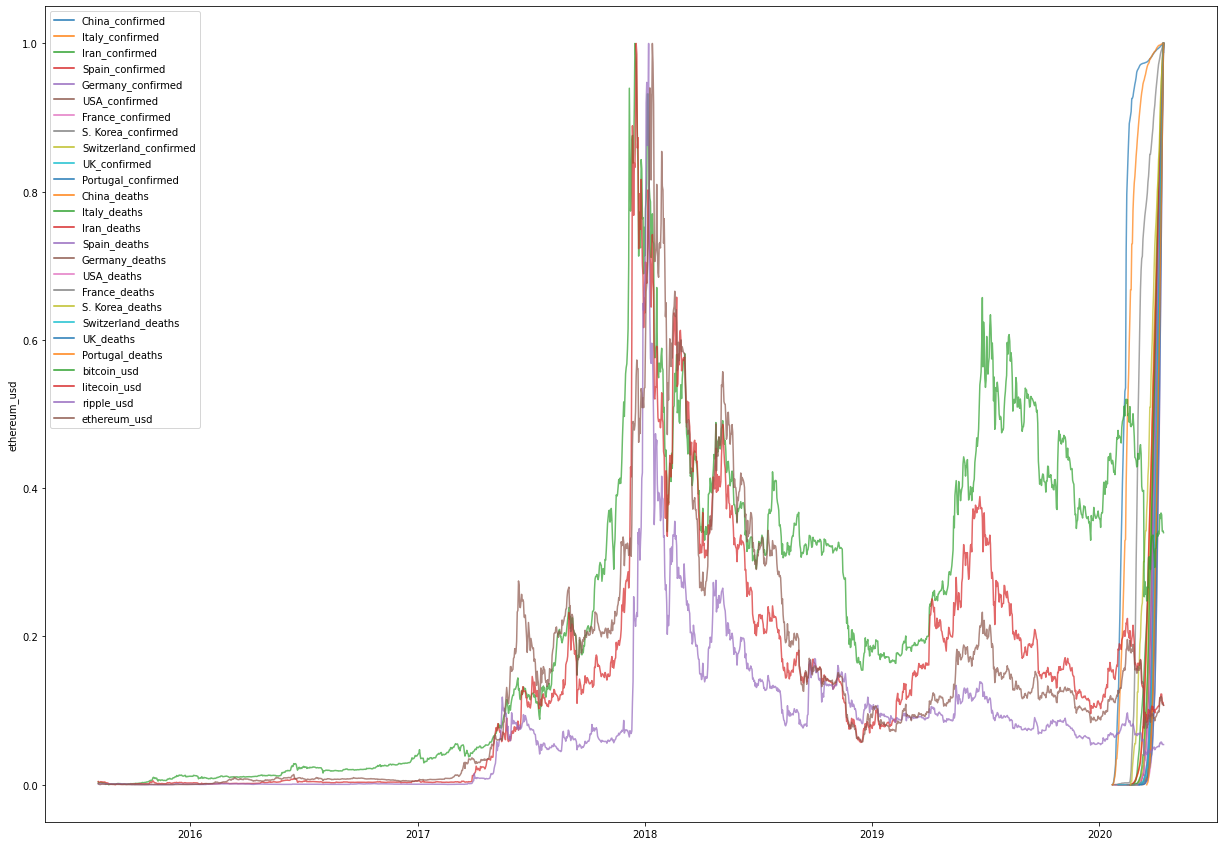

In [14]:
from sklearn import preprocessing

df.drop(['bitcoin_web', 'ethereum_web', 'ripple_web', 'litecoin_web'], axis=1, inplace=True)

x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns=df.columns, index=df.index)

plt.figure(figsize=(21, 15))
dates  = [datetime.date(year=int(s[:4]), month=int(s[5:7]), day=int(s[8:])) for s in df.index.values]
for c in df.columns:
    if '_usd' not in c:
        sns.lineplot(data=df_normalized, x=dates, y=c, legend='brief', label=c)
for c in df.columns:
    if '_usd' in c:
        sns.lineplot(data=df_normalized, x=dates, y=c, legend='brief', label=c)
for l in plt.gca().lines:
    l.set_alpha(.7)

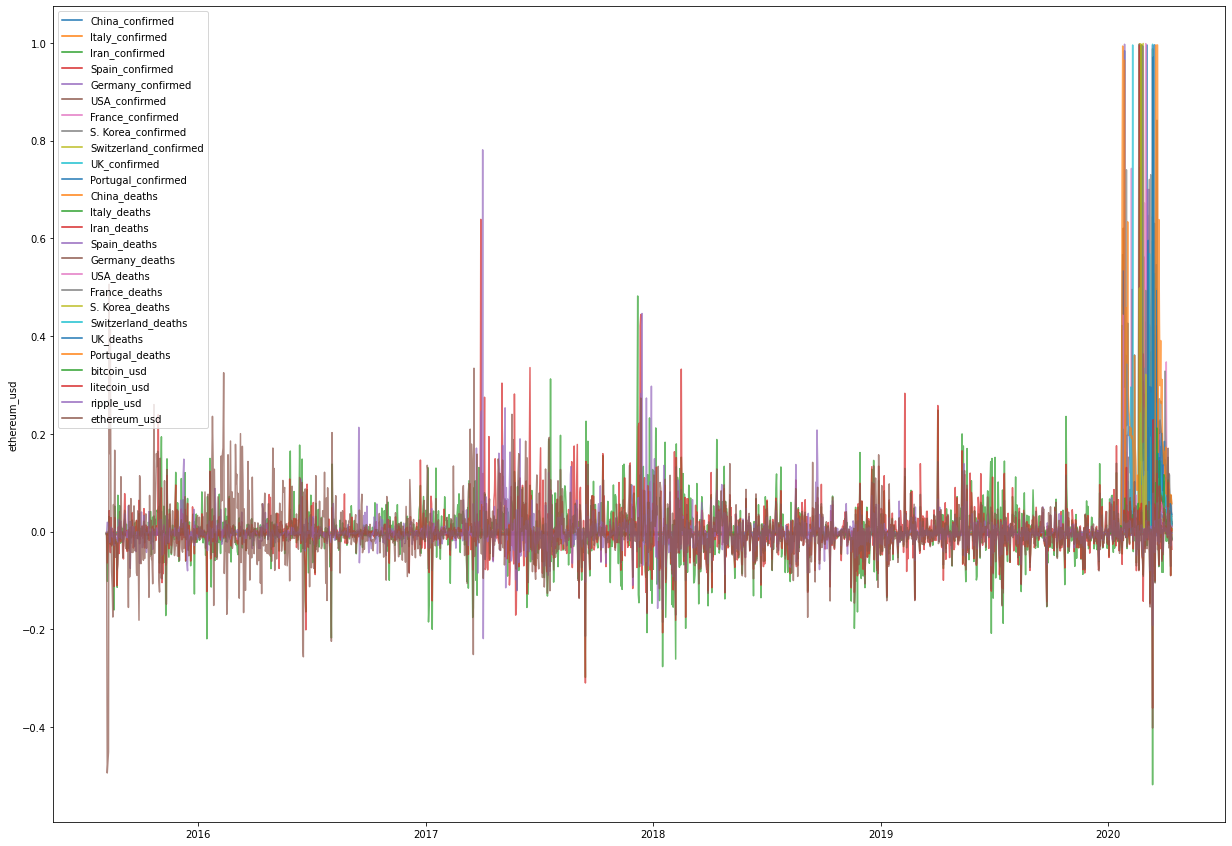

In [15]:
df = df.pct_change().fillna(0)

df = (df - df.mean()) / (df.max() - df.min())

plt.figure(figsize=(21, 15))
dates  = [datetime.date(year=int(s[:4]), month=int(s[5:7]), day=int(s[8:])) for s in df.index.values]
for c in df.columns:
    if '_usd' not in c:
        sns.lineplot(data=df, x=dates, y=c, legend='brief', label=c)
for c in df.columns:
    if '_usd' in c:
        sns.lineplot(data=df, x=dates, y=c, legend='brief', label=c)
for l in plt.gca().lines:
    l.set_alpha(.7)

In [16]:
df.to_csv("../../data/processed_dataset.csv")